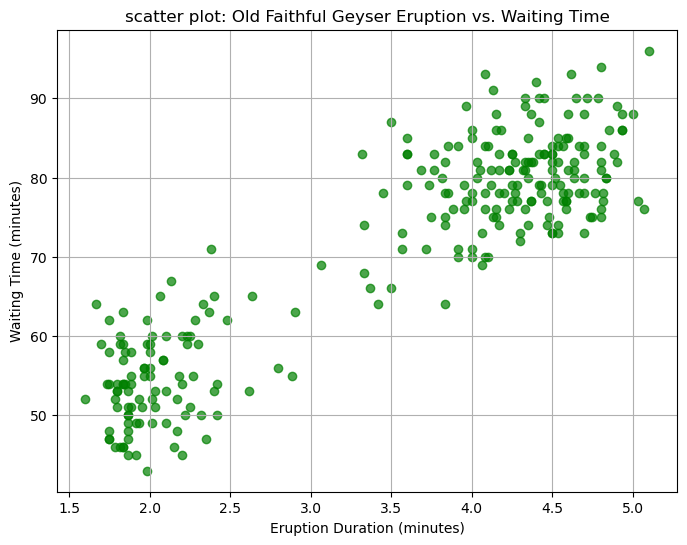

In [4]:
# HW 3

# Problem 1:

# (a):

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/m.sushanthreddy/Downloads/faithful.csv')

plt.figure(figsize=(8, 6))
plt.scatter(data['eruptions'], data['waiting'], color='green', alpha=0.7)
plt.title('scatter plot: Old Faithful Geyser Eruption vs. Waiting Time')
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)
plt.show()


In [ ]:
# (b):

# ans): Based on the scatter plot, there are two clusters formed:

#       Cluster 1: Short eruption and short wait time: 
#                  These eruptions are brief (around 2 minutes or less), and the wait time is 
#                  less (around 50–70 minutes).

#       Cluster 2: Long eruption and long wait time:
#                  These eruptions are longer (around 4 minutes), and the wait time is also longer
#                  (around 80–100 minutes).

In [5]:
# (c):

# ans): 
# Hierarchical clustering is the process of building a hierarchy of clusters.

# There are two types of hierarchical clustering and are:

# 1): Divisive (top-down) hierarchical clustering:

# steps:

# 1): Start with all data points in a single cluster.
# 2): Split the cluster into two sub-clusters using any method like K-Means (with K = 2), spatial clustering 
#     or any other method. The split should have high intra-cluster similarity and low inter-cluster similarity.
# 3): Now, recursively considering whether it is worth splitting each one further. Evaluate the split using
#     measures like distance metrics, variance, or silhouette scores.
# 4): The above steps produces a hierarchy that can be represented as a binary tree called a dendrogram.

# 2): Agglomerative (bottom-up) hierarchical clustering:

# Steps:

# 1): Start by considering each data point as its own cluster. 
#     If there are n data points, then start with n clusters.
# 2): Calculate the distance between each pair of clusters.
# 3): Merge the two clusters using any linkage method like single, complete and average.
# 4): Repeat step 2 and 3 until all the points are merged into a single cluster.
# 5): The record of mergings forms a binary dendrogram. 
#     The dendogram can be cut at a specific height to define the number of clustors.


# Based on the scatter plot, hierarchical clustering would be appropriate for this dataset.
# The scatter plot shows 2 well-separated clusters, which can be detected by hierarchical clustering without
# specifying the number of clusters (like in K-Means). Hierarchical clustering also provides a dendrogram, which
# helps visually decide how many clusters exist in the data. Hierarchical clustering works well when clusters are
# different in shape and size, similar to this dataset.

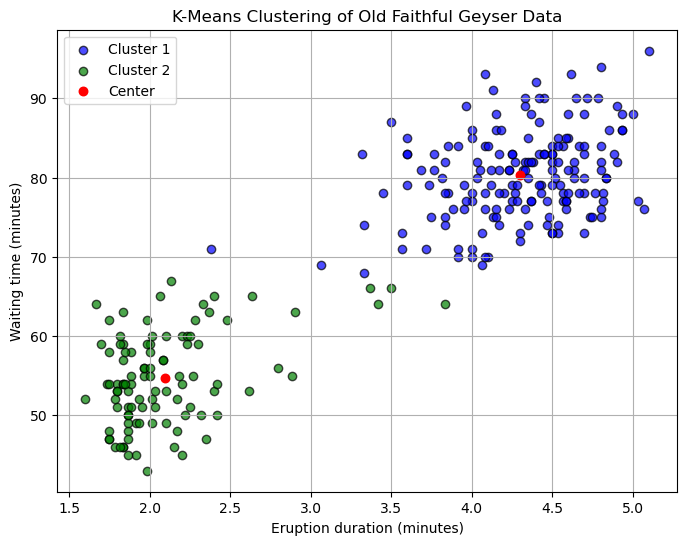

In [10]:
# Problem 2:

# (a):

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/m.sushanthreddy/Downloads/faithful.csv')

X = df[['eruptions', 'waiting']].values

def k_means(X, k, max_iters=100):
    np.random.seed(42)
    random_indices = np.random.choice(len(X), size=k, replace=False)
    centers = X[random_indices]
    for iteration in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centers, new_centers):
            break
        centers = new_centers
    return centers, labels

k = 2
centers, labels = k_means(X, k)

# (b):

plt.figure(figsize=(8, 6))
colors = ['blue', 'green']
for i in range(k):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors[i], label=f'Cluster {i+1}', alpha=0.7, edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1], 
            color='red', marker='.', s=150, label='Center')
plt.xlabel('Eruption duration (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('K-Means Clustering of Old Faithful Geyser Data')
plt.legend()
plt.grid(True)
plt.show()


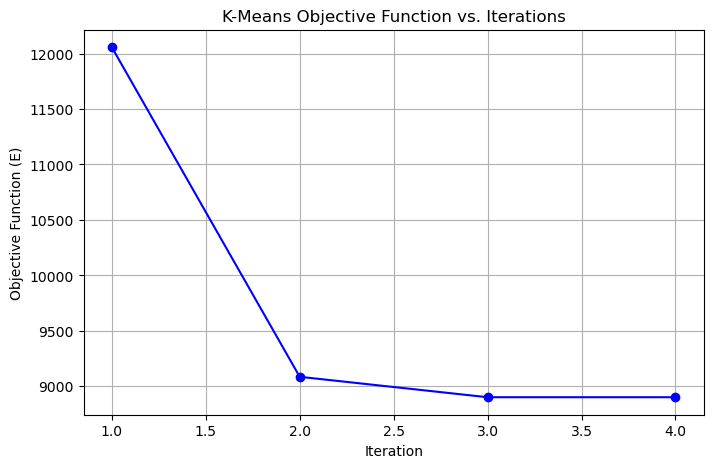

New run - Iterations: 4


In [20]:
# (c):

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/m.sushanthreddy/Downloads/faithful.csv')
X = df[['eruptions', 'waiting']].values

def compute_objective(X, centers, labels):
    return np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in range(len(centers))])

def kmeans_with_objective(X, k, max_iters=20):
    np.random.seed(42)
    centers = X[np.random.choice(len(X), k, replace=False)]
    objectives = []

    for i in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)
        obj = compute_objective(X, centers, labels)
        objectives.append(obj)
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        if np.allclose(centers, new_centers):
            break
        centers = new_centers

    return objectives

k = 2
objectives = kmeans_with_objective(X, k)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(objectives) + 1), objectives, marker='o', color='blue')
plt.title('K-Means Objective Function vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function (E)')
plt.grid(True)
plt.show()

np.random.seed(99)
objectives = kmeans_with_objective(X, k)

print("New run - Iterations:", len(objectives))


In [ ]:
# (d):

# ans): 

# Yes, the K-Means method successfully identified the two main clusters that were visible in the scatter plot from
# Problem 1. In the scatter plot of problem 1, there were two clustures visible:
# Short eruption and short wait time, and Long eruption and long wait time.
# The K-Means algorithm also grouped the points similarly into: 
# Cluster 1:lower-left group (short eruptions and short waiting)
# Cluster 2: upper-right group (long eruptions and long waiting)
# Since the clustering results of the method matched the visual interpretation of the scatter plot in problem 1,
# the method worked well on the first run. Even when a random initializer is used, the model still gave the same
# clusters in same number of iterations.